In [1]:
# Scientific
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interp
import statsmodels
from statsmodels.tsa.stattools import adfuller

# General
import itertools
import copy
import re
from datetime import datetime
import random
import timeit
from itertools import cycle


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ml_df = pd.read_csv('ml_df.csv')
ml_df = ml_df[ml_df.DBL_ActualDate > '2012-12-31']

FileNotFoundError: [Errno 2] No such file or directory: 'ml_df.csv'

In [5]:
dates_df = ml_df[['DBL_ActualDate', 'CloseOut','Classes']]
dates_df = dates_df.sort_values(by = 'DBL_ActualDate')


dates_df.loc[:, 'Year'] = pd.DatetimeIndex(dates_df.DBL_ActualDate).year
dates_df.loc[:, 'Month'] = pd.DatetimeIndex(dates_df.DBL_ActualDate).month
dates_df.loc[:, 'MonthYear'] = pd.to_datetime(dates_df['DBL_ActualDate']).dt.to_period('M')
dates_df.loc[:, 'MonthYear'] = dates_df.MonthYear.astype(str)
dates_df.loc[:, 'Season'] = pd.to_datetime(dates_df['DBL_ActualDate']).dt.month%12 // 3 + 1
dates_df.loc[:, 'YearSeason'] = dates_df.Year.astype(str)+'-'+dates_df.Season.astype(str)

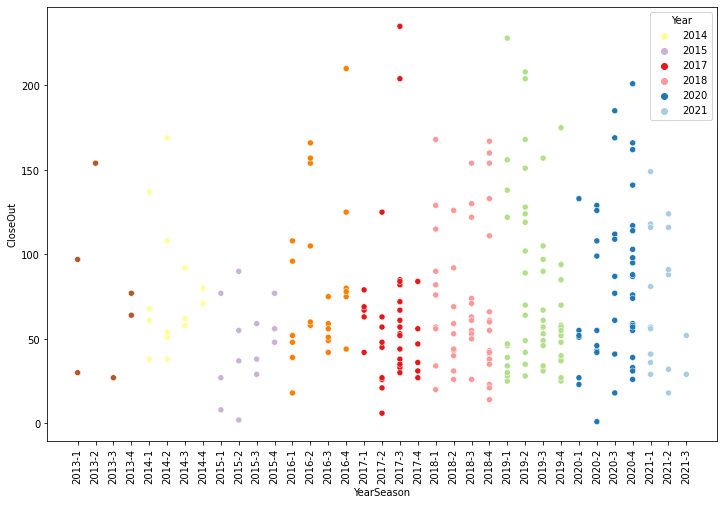

In [6]:
# Plotting General 
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.scatterplot(data = dates_df, x = 'YearSeason', y = 'CloseOut', hue = 'Year', palette = 'Paired_r')
plt.show()

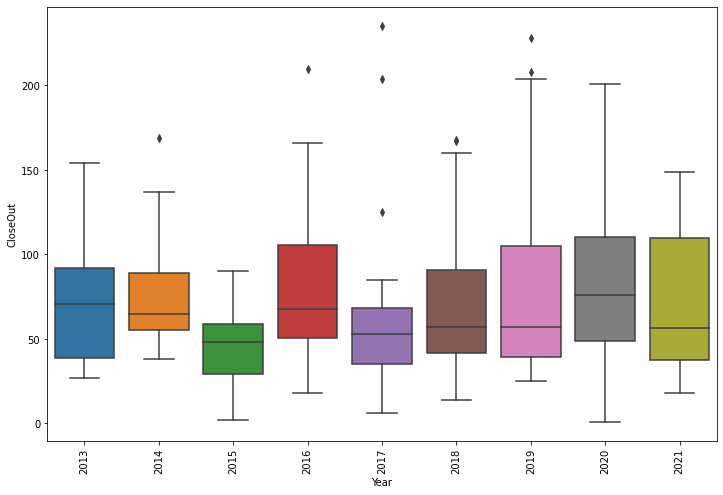

In [7]:
# Plotting by Year 
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.boxplot(data = dates_df, x = 'Year', y = 'CloseOut')
plt.show()

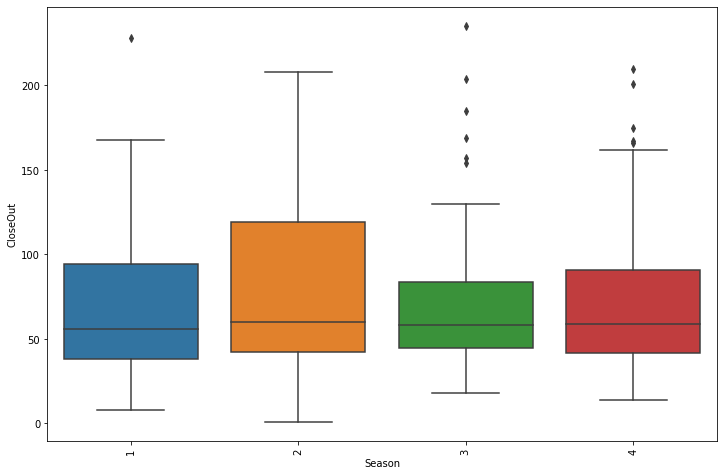

In [8]:
# Plotting by Season
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.boxplot(data = dates_df, x = 'Season', y = 'CloseOut')
plt.show()

In [9]:
class_df = dates_df.groupby(by =['Year', 'MonthYear', 'Classes']).agg({'Classes':['count'], 
                                                               'CloseOut': ['median', 'mean']}).reset_index()

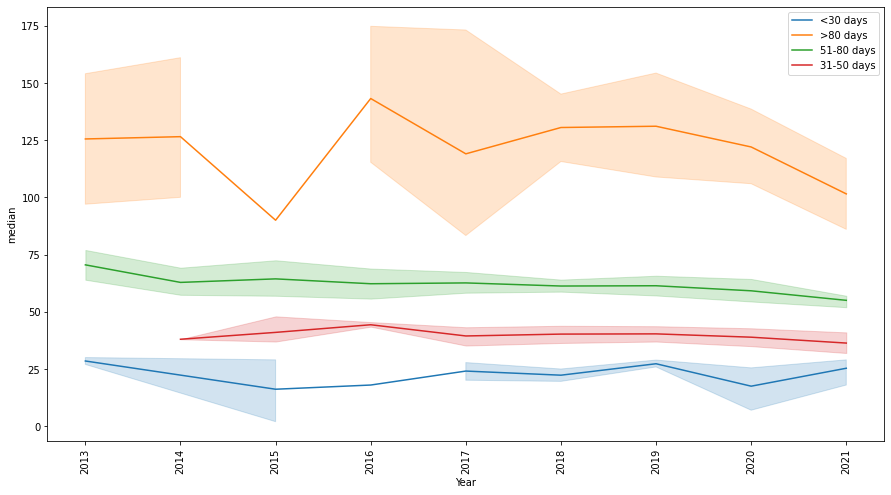

In [10]:
# Plotting by Class
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.lineplot(data = class_df, x = 'Year', y = class_df.CloseOut['median'], hue = class_df.Classes[''])
plt.show()

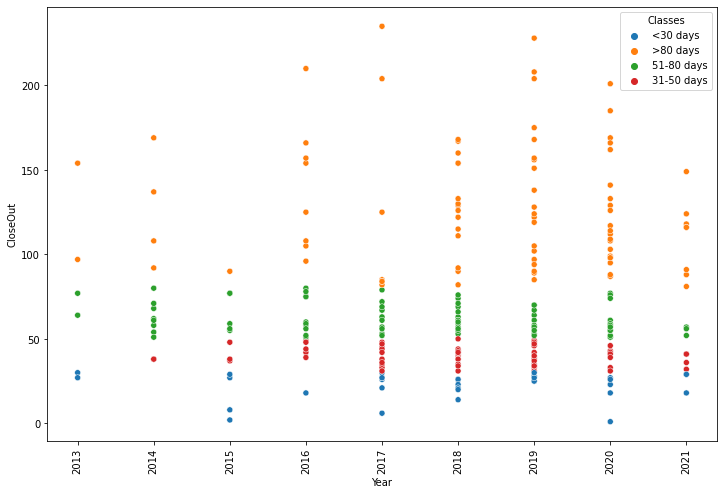

In [11]:
# Plotting by Class
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.scatterplot(data = dates_df, x = 'Year', y = 'CloseOut', hue = 'Classes')
plt.show()

In [12]:
# Aggregating by Season and Year 
agg_dates = dates_df.groupby(by=['YearSeason']).agg({'CloseOut': ['median', 'mean']}).reset_index()
agg_dates.loc[:, 'RollingMedian'] = agg_dates.CloseOut['median'].rolling(window=2).mean()
agg_dates.RollingMedian = agg_dates.RollingMedian.replace(np.nan, 236)

In [13]:
# Aggregating by Year 
agg_years = dates_df.groupby(by=['Year']).agg({'CloseOut': ['median', 'mean']}).reset_index()
agg_years.loc[:, 'RollingMedian'] = agg_dates.CloseOut['median'].rolling(window=2).mean()
agg_years.loc[:, 'RollingMean'] = agg_dates.CloseOut['mean'].rolling(window=2).mean()
agg_years.RollingMedian = agg_years.RollingMedian.replace(np.nan, 34)
agg_years.RollingMean = agg_years.RollingMean.replace(np.nan, 34)

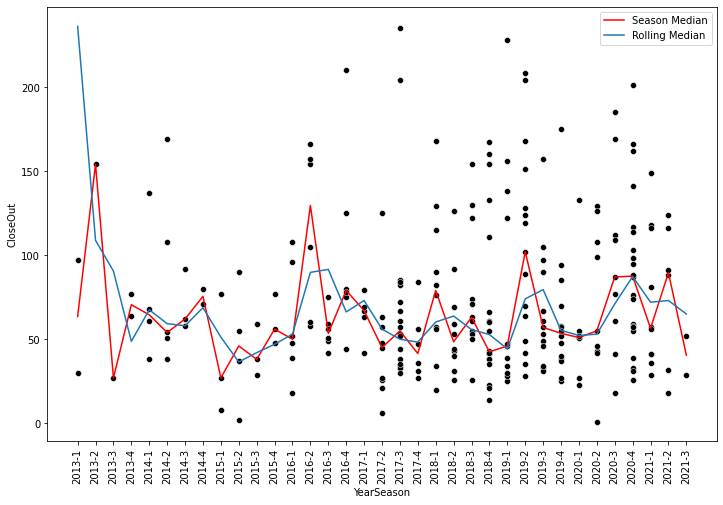

In [14]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.scatterplot(data = dates_df, x = 'YearSeason', y = 'CloseOut', color = 'k')#, hue = 'Year', palette = 'Paired_r')
sns.lineplot(data = agg_dates, x = 'YearSeason', y = agg_dates.CloseOut['median'], 
             label = 'Season Median', color = 'r')
sns.lineplot(data = agg_dates, x = 'YearSeason', y = 'RollingMedian', label = 'Rolling Median')
#sns.lineplot(data = agg_years, x = 'Year', y = agg_years.CloseOut['median'], label = 'Median Years')
plt.show()

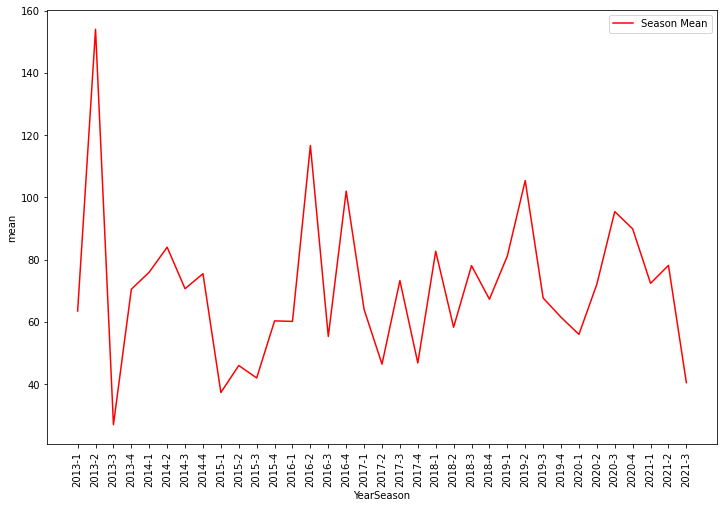

In [15]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.lineplot(data = agg_dates, x = 'YearSeason', y = agg_dates.CloseOut['mean'], 
             label = 'Season Mean', color = 'r')
plt.show()

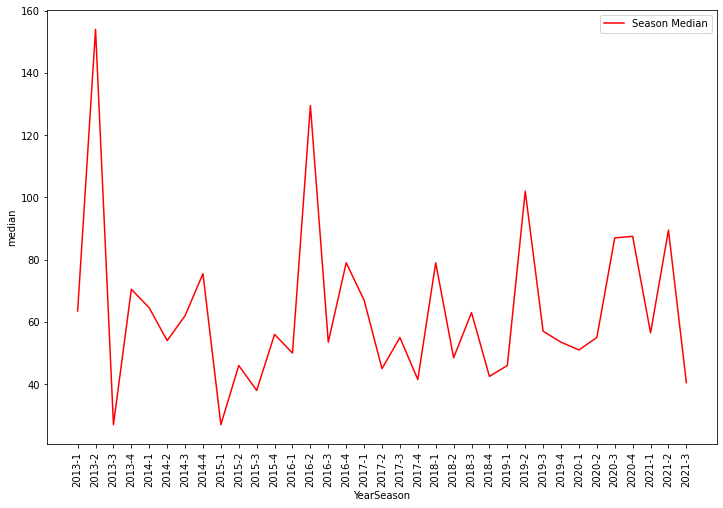

In [16]:
plt.figure(figsize = (12,8))
plt.xticks(rotation=90)
sns.lineplot(data = agg_dates, x = 'YearSeason', y = agg_dates.CloseOut['median'], 
             label = 'Season Median', color = 'r')
plt.show()

In [17]:
def get_vals(result):
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    pass

In [18]:
# Year-Season
print('Results for Year-Season with Mean')
result = adfuller(agg_dates.CloseOut['mean'])
get_vals(result)

print('Results for Year-Season with Median')
result = adfuller(agg_dates.CloseOut['median'])
get_vals(result)

Results for Year-Season with Mean
ADF Statistic: -3.591289
p-value: 0.005930
Critical Values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
Results for Year-Season with Median
ADF Statistic: -7.107554
p-value: 0.000000
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [19]:
# Year-Month
agg_months = dates_df.groupby(by=['MonthYear']).agg({'CloseOut': ['median', 'mean']}).reset_index()

print('Results for Year-Month with Mean')
result = adfuller(agg_months.CloseOut['mean'])
get_vals(result)

print('Results for Year-Month with Median')
result = adfuller(agg_months.CloseOut['median'])
get_vals(result)

Results for Year-Month with Mean
ADF Statistic: -9.439143
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
Results for Year-Month with Median
ADF Statistic: -9.733303
p-value: 0.000000
Critical Values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
